In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
! ls -l /data/sstamenov/kaggle-data/clean

total 380368
-rw-rw-r-- 1 sstamenov sstamenov   6447320 dub 10 17:00 articles.parquet
-rw-rw-r-- 1 sstamenov sstamenov 110126506 dub 10 17:01 customers.parquet
drwxrwxr-x 2 sstamenov sstamenov    905216 dub 13 23:13 simil
-rw-rw-r-- 1 sstamenov sstamenov   1750169 dub 13 23:16 similarity_table.parquet
-rw-rw-r-- 1 sstamenov sstamenov 270254632 dub 10 17:02 transactions.parquet


a - is the item-id
b - is the id of the similar item

Items with high similarity are complementary objects (like swimsuit or pyjamas sets).
It is very likely that if customer bought `a` item, he bought `b` item in the same transaction.

same prod but different color

or actually a similar item

In [6]:
from kaggle_hm.utils import init_nb
from kaggle_hm.config import data_root
init_nb()

In [11]:
df = pd.read_parquet(data_root / 'clean' / 'similarity_table.parquet').query('len_common >= 2')
df['len_bin'] = pd.cut(df['len_common'], bins=[2, 5, 10, 20, 50, 100, 1000])
items = pd.read_parquet(data_root / 'clean' / 'articles.parquet')

In [80]:
df = (
    df
    .merge(items[['article_id', 'product_code']], left_on='a', right_on='article_id')
    .merge(items[['article_id', 'product_code']], left_on='b', right_on='article_id', suffixes=('_a', '_b'))
    .drop(columns=['article_id_a', 'article_id_b'])
)

In [96]:
df[['a', 'b']].describe()

,a,b
count,19806,19806
unique,9540,9540
top,0904571001,0904571001
freq,18,18


In [97]:
df.describe()

,simil,len_b,len_common,len_a,product_code_a,product_code_b
count,19806.0000,19806.0000,19806.0000,19806.0000,19806.0000,19806.0000
mean,0.1794,77.6850,11.6295,77.6850,793318.7865,793318.7865
std,0.1049,167.3501,26.6836,167.3501,128105.1281,128105.1281
min,0.1000,2.0000,2.0000,2.0000,111565.0000,111565.0000
25%,0.1174,13.0000,2.0000,13.0000,744394.0000,744394.0000
50%,0.1436,27.0000,3.0000,27.0000,833499.0000,833499.0000
75%,0.1979,67.0000,9.0000,67.0000,879096.0000,879096.0000
max,1.0000,2639.0000,501.0000,2639.0000,953763.0000,953763.0000


In [99]:
df[df['product_code_a'] != df['product_code_b']].shape

(12304, 8)

count   9540.0000
mean       2.0761
std        1.6677
min        1.0000
25%        1.0000
50%        1.0000
75%        3.0000
max       18.0000
Name: a, dtype: float64


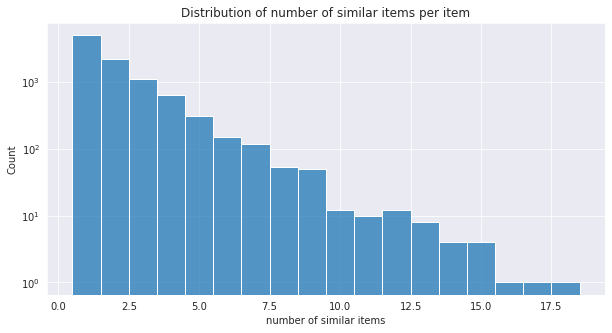

In [63]:
s = df['a'].value_counts()

print(s.describe())

ax = sns.histplot(s, log_scale=(False, True), discrete=True)

ax.set(title='Distribution of number of similar items per item', xlabel='number of similar items');

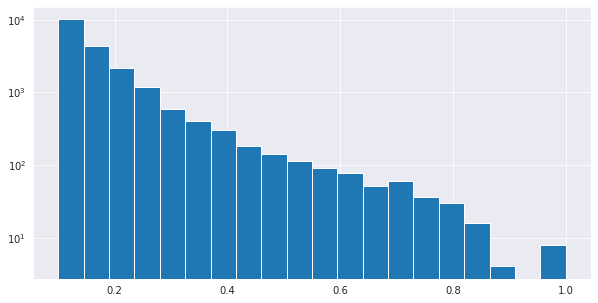

In [64]:
df['simil'].hist(bins=20)
plt.yscale('log')

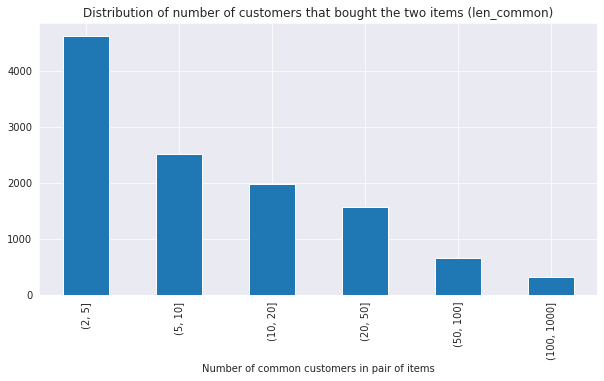

In [133]:
pd.cut(df['len_common'], bins=[2, 5, 10, 20, 50, 100, 1000]).value_counts().plot.bar()
# plt.yscale('log')
plt.title('Distribution of number of customers that bought the two items (len_common)')
plt.xlabel('Number of common customers in pair of items');

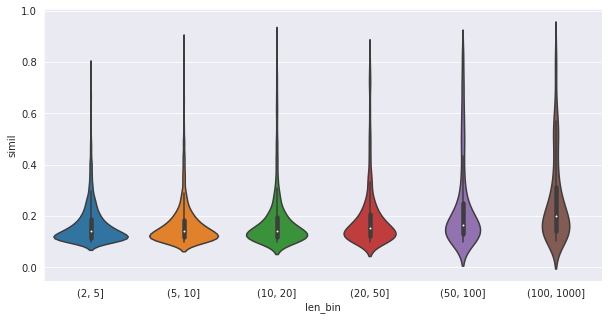

In [125]:
sns.violinplot(data=df, x='len_bin', y='simil');

In [31]:
from kaggle_hm.utils import plot_item

def plot_pair(a, b):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    plot_item(a, ax=ax[0])
    plot_item(b, ax=ax[1])

In [112]:
df.sort_values('len_common', ascending=False).head(20)

,simil,len_b,len_common,len_a,b,a,product_code_a,product_code_b
13367,0.5407,1313,501,654,0896169002,0918836001,918836,896169
13369,0.5407,654,501,1313,0918836001,0896169002,896169,918836
3166,0.4542,1385,443,687,0918292004,0868823007,868823,918292
8452,0.4542,687,443,1385,0868823007,0918292004,918292,868823
9855,0.7664,594,442,560,0935892001,0936622001,936622,935892
14591,0.7664,560,442,594,0936622001,0935892001,935892,936622
3170,0.3577,561,425,2517,0856270002,0918292001,918292,856270
5875,0.3577,2517,425,561,0918292001,0856270002,856270,918292
19613,0.7195,579,418,583,0944506001,0909924002,909924,944506
6999,0.7195,583,418,579,0909924002,0944506001,944506,909924


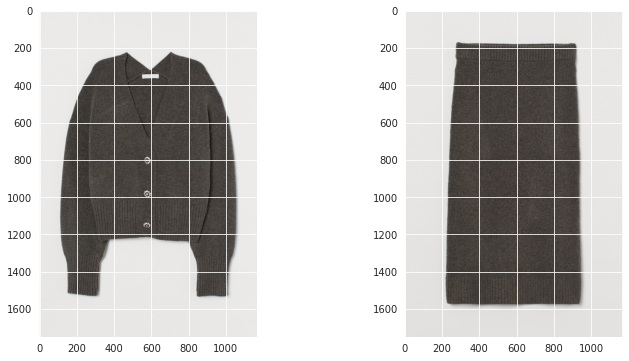

In [113]:
plot_pair('0896169002', '0918836001')

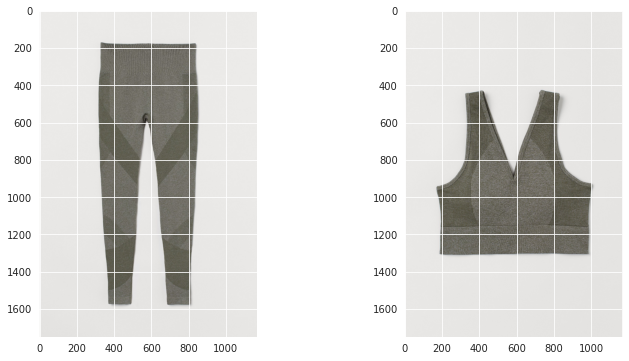

In [120]:
plot_pair('0918292004', '0868823007')

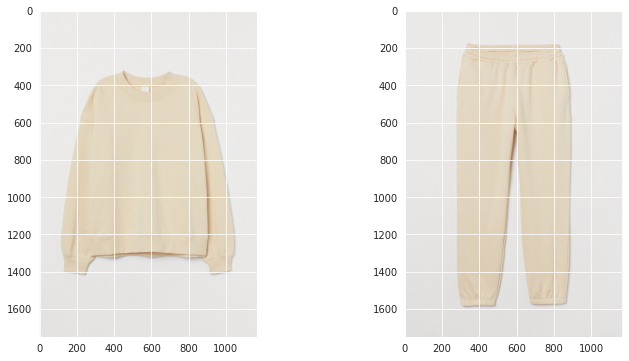

In [122]:
plot_pair('0935892001', '0936622001')

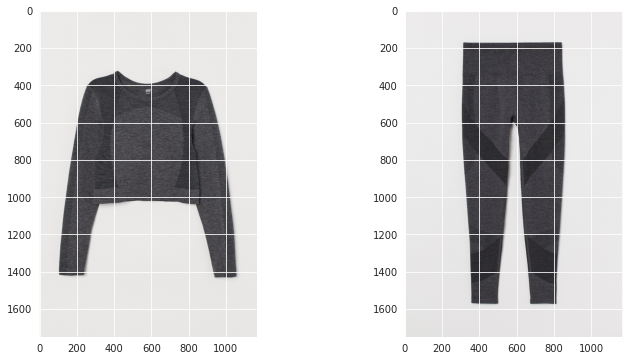

In [126]:
plot_pair('0856270002', '0918292001')

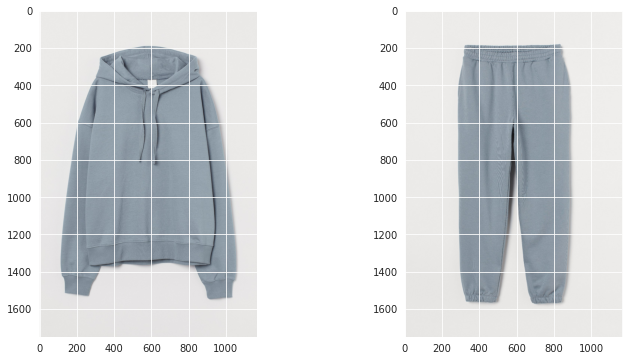

In [127]:
plot_pair('0944506001', '0909924002')

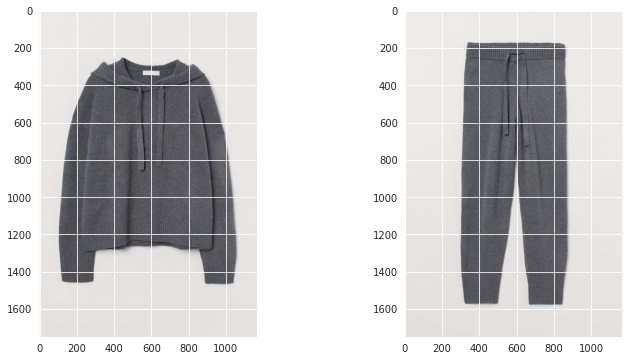

In [128]:
plot_pair('0909912001', '0909911001')

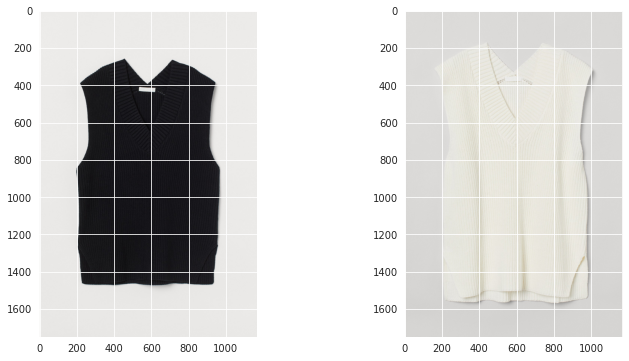

In [129]:
plot_pair('0915526002', '0915526001')

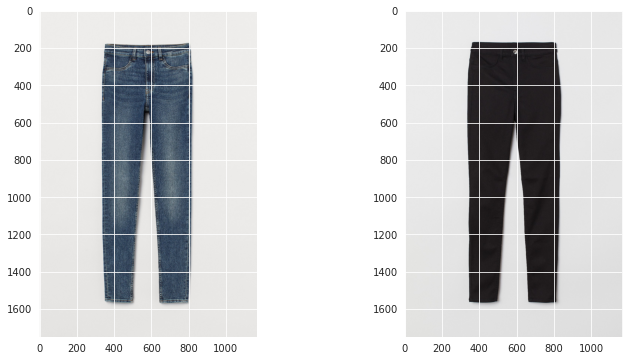

In [130]:
plot_pair('0706016003', '0706016001')

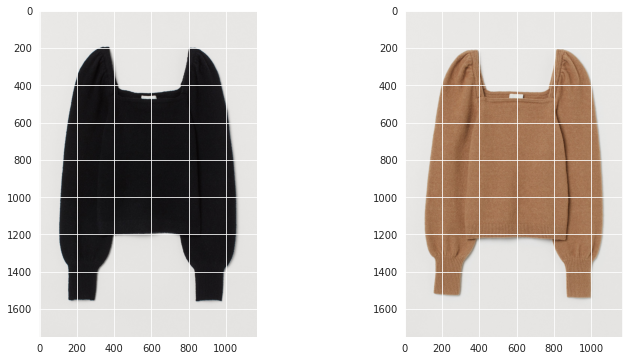

In [131]:
plot_pair('0915529003', '0915529001')

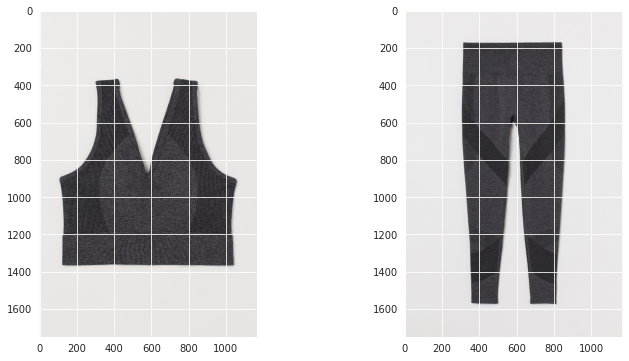

In [132]:
plot_pair('0868823008', '0918292001')

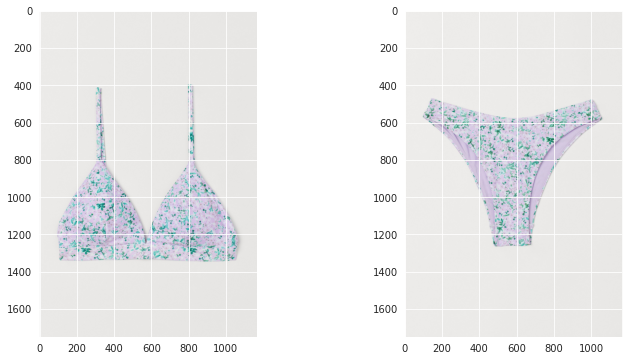

In [121]:
plot_pair('0882757004', '0882759006')

In [90]:
df.sample(n=10)

,simil,len_b,len_common,len_a,b,a,product_code_a,product_code_b
11792,0.4331,315,96,156,0909924001,0909925001,909925,909924
11975,0.1137,12,3,58,0917763001,0925509001,925509,917763
4519,0.2191,100,12,30,0742400033,0742400046,742400,742400
18296,0.1414,25,4,32,0776746013,0776746015,776746,776746
11004,0.2075,114,39,310,0889652003,0889652001,889652,889652
19052,0.1689,33,4,17,0939160002,0939160001,939160,939160
1877,0.1976,40,5,16,0782479005,0782479007,782479,782479
3061,0.1782,28,4,18,0892971001,0892971003,892971,892971
18094,0.3162,5,2,8,0750528014,0870519003,870519,750528
19283,0.2418,73,24,135,0881916001,0881916002,881916,881916


In [88]:
items[items['article_id'].str.startswith('0877131')]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
98052,0877131001,877131,Tie 2-pack Summer Floral,82,Tie,Accessories,1010001,All over pattern,9,Black,4,Dark,5,Black,9986,Small Accessories,F,Menswear,3,Menswear,25,Men Accessories,1019,Accessories,Satin ties. One in a solid colour and one patt...
98053,0877131002,877131,Tie 2-pack Summer Floral,82,Tie,Accessories,1010012,Mixed solid/pattern,73,Dark Blue,4,Dark,2,Blue,9986,Small Accessories,F,Menswear,3,Menswear,25,Men Accessories,1019,Accessories,Satin ties. One in a solid colour and one patt...


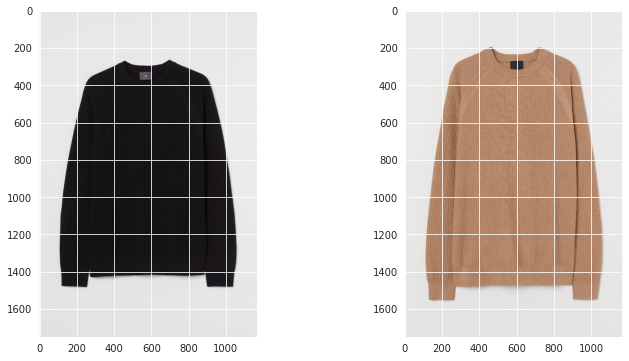

In [95]:
plot_pair('0782479005', '0782479007')

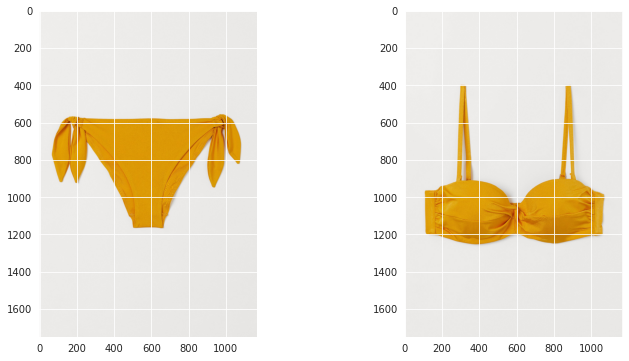

In [72]:
plot_pair('0832114002', '0776237006')

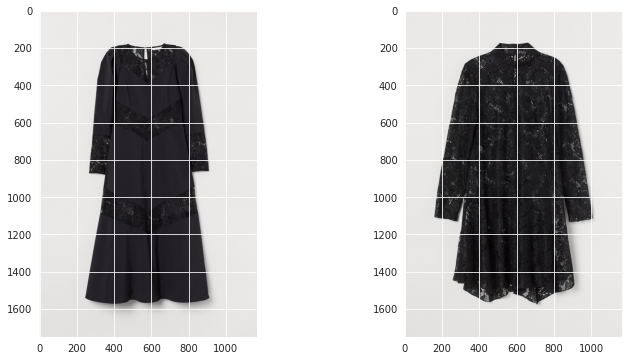

In [68]:
# 0.2224,103,22,95
plot_pair('0908799002', '0909371001')

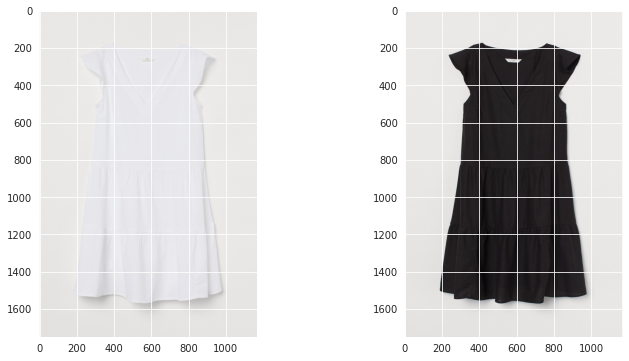

In [53]:
# 0.2208,27,5,19
plot_pair('0882485001', '0882485003')

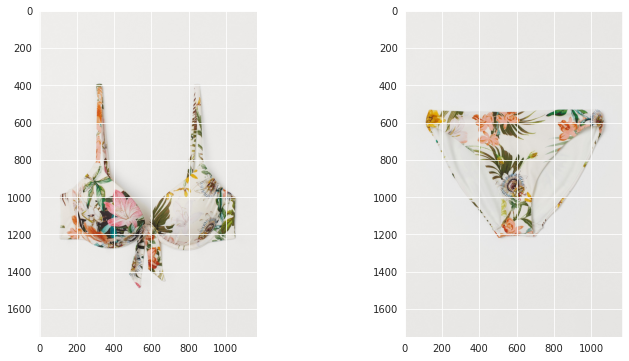

In [49]:
# 0.4824,77,45,113
plot_pair('0811835003', '0599580061')

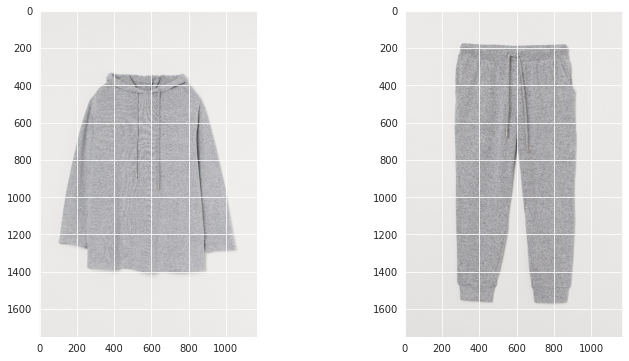

In [45]:
# 0.5089,110,70,172
plot_pair('0906639003', '0924645001')